In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crack-v2i-yolov11/README.dataset.txt
/kaggle/input/crack-v2i-yolov11/valid/labels/2563.rf.a9645955318dae0a1ff7f249a262a59b.txt
/kaggle/input/crack-v2i-yolov11/valid/images/2115.rf.699535b9bba0f3fdc143f2f3cba3ecdf.jpg
/kaggle/input/crack-v2i-yolov11/test/labels/2323.rf.06768caef93b3a44d3c59325a03230eb.txt
/kaggle/input/crack-v2i-yolov11/test/images/2437.rf.0d98e6b224e34447aafdf882383ea14a.jpg
/kaggle/input/crack-v2i-yolov11/train/labels/3160.rf.32dd9d15baa91334a33bcc0e8ea316f9.txt
/kaggle/input/crack-v2i-yolov11/train/images/3414.rf.ee4e88542fe4ea130045363811b3c6be.jpg


In [3]:
import os

In [4]:
def get_files(folder_path):
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        files=[file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path,file))]
        num_files=len(files)
        print(f"Number of files in '{folder_path}':'{num_files}'")
    else:
        print(f"Folder '{folder_path}' doesnt exist or is not a directory.")

In [9]:
def check_files(dir_path,structure=['images','labels']):
    folders=os.listdir(dir_path)
    for folder in folders:
        folder_path=os.path.join(dir_path,folder)
        if os.path.isdir(folder_path):
            sub_folders=os.listdir(folder_path)
            for final_folders in sub_folders:
                if final_folders in structure:
                    get_files(os.path.join(folder_path,final_folders))

In [10]:
check_files('/kaggle/input/crack-v2i-yolov11')

Number of files in '/kaggle/input/crack-v2i-yolov11/valid/labels':'200'
Number of files in '/kaggle/input/crack-v2i-yolov11/valid/images':'200'
Number of files in '/kaggle/input/crack-v2i-yolov11/test/labels':'112'
Number of files in '/kaggle/input/crack-v2i-yolov11/test/images':'112'
Number of files in '/kaggle/input/crack-v2i-yolov11/train/labels':'3717'
Number of files in '/kaggle/input/crack-v2i-yolov11/train/images':'3717'


#### Model Training

In [12]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 2.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

In [13]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [19]:
model=YOLO('yolo11m-seg.pt')

In [17]:
coco_path='/kaggle/input/crack-v2i-yolov11/data.yaml'
epochs=100
input_image_size=640
patience=5
batch=8
val=True
cache='disk'
plots=True
project='YOLOv11-instance-segmentation'

In [20]:
results=model.train(data=coco_path,epochs=epochs,imgsz=input_image_size,
                   patience=patience,batch=batch,cache=cache,plots=plots,
                   project=project)

Ultralytics 8.3.195 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/crack-v2i-yolov11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        200        249      0.822      0.695      0.764      0.542      0.703      0.598      0.581      0.194
Speed: 0.3ms preprocess, 16.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /kaggle/working/YOLOv11-instance-segmentation/train


In [22]:
import zipfile
import os

def zip_folder(folder_path, output_zip_path):
    try:
        with zipfile.ZipFile(output_zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, dirs, files in os.walk(folder_path):
                for file in files:
                    file_path = os.path.join(root, file)
                    arc_name = os.path.relpath(file_path, folder_path)
                    zipf.write(file_path, arc_name)
        print(f"Folder '{folder_path}' zipped successfully to '{output_zip_path}'")
    except FileNotFoundError:
        print(f"Error: Folder '{folder_path}' not found")
    except Exception as e:
        print(f"An error occurred: {e}")

In [25]:
folder_to_zip='/kaggle/working/YOLOv11-instance-segmentation/'
output_zip_file='/kaggle/working/yolo_trained.zip'


zip_folder(folder_to_zip,output_zip_file)

Folder '/kaggle/working/YOLOv11-instance-segmentation/' zipped successfully to '/kaggle/working/yolo_trained.zip'


In [2]:
!unzip yolo_train_backup.zip -d ./YOLOv11-instance-segmentation

Archive:  yolo_train_backup.zip
  inflating: ./YOLOv11-instance-segmentation/results.png  
  inflating: ./YOLOv11-instance-segmentation/val_batch0_labels.jpg  
  inflating: ./YOLOv11-instance-segmentation/MaskPR_curve.png  
  inflating: ./YOLOv11-instance-segmentation/val_batch2_labels.jpg  
  inflating: ./YOLOv11-instance-segmentation/args.yaml  
  inflating: ./YOLOv11-instance-segmentation/BoxP_curve.png  
  inflating: ./YOLOv11-instance-segmentation/BoxR_curve.png  
  inflating: ./YOLOv11-instance-segmentation/MaskP_curve.png  
  inflating: ./YOLOv11-instance-segmentation/labels.jpg  
  inflating: ./YOLOv11-instance-segmentation/BoxF1_curve.png  
  inflating: ./YOLOv11-instance-segmentation/confusion_matrix_normalized.png  
  inflating: ./YOLOv11-instance-segmentation/val_batch1_labels.jpg  
  inflating: ./YOLOv11-instance-segmentation/BoxPR_curve.png  
  inflating: ./YOLOv11-instance-segmentation/MaskR_curve.png  
  inflating: ./YOLOv11-instance-segmentation/train_batch2.jpg  
  in

## Model Inferencing

In [7]:
from ultralytics import YOLO
import os

In [5]:
model=YOLO('YOLOv11-instance-segmentation/weights/best.pt')

#### Inference on an Image

In [8]:
file_name='crack-surface.jpg'
results=model(file_name)


for result in results:
    result.show()
    file_name,ext=os.path.splitext(file_name)
    result.save(filename=f"{file_name}_output.jpg")


image 1/1 /home/bhupen/Python_Learning/image-segmentation/crack-surface.jpg: 480x640 2 cracks, 466.9ms
Speed: 2.6ms preprocess, 466.9ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


#### Inference on Batch of Images

In [9]:
file_name_1='crack-surface-1.jpg'
file_name_2='crack-surface-2.jpg'

batch=[file_name_1,file_name_2]

results=model(batch)

for idx,result in enumerate(results):
    print(idx)
    result.show()
    # file_name,ext=os.path.splitext(batch[idx])
    # result.save(filename=f"{file_name}_output_{idx}.jpg")


0: 640x640 3 cracks, 616.4ms
1: 640x640 3 cracks, 616.4ms
Speed: 7.7ms preprocess, 616.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
0
1


Opening in existing browser session.


[51:51:0907/161638.939249:ERROR:ui/gl/gl_surface_presentation_helper.cc:260] GetVSyncParametersIfAvailable() failed for 1 times!
[51:51:0907/161646.354463:ERROR:ui/gl/gl_surface_presentation_helper.cc:260] GetVSyncParametersIfAvailable() failed for 2 times!
[51:51:0907/161652.348356:ERROR:ui/gl/gl_surface_presentation_helper.cc:260] GetVSyncParametersIfAvailable() failed for 3 times!


### Inference on np.ndarray

In [10]:
import cv2 as cv

In [20]:
file_name='crack-surface.jpg'
image_array=cv.imread(file_name)
print(type(image_array))

<class 'numpy.ndarray'>


In [21]:
results=model(image_array)

for result in results:
    result.show()
    file_name,ext=os.path.splitext(file_name)
    result.save(filename=f"{file_name}_output_.jpg")


0: 480x640 2 cracks, 437.6ms
Speed: 2.9ms preprocess, 437.6ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


### Extract Masks like Semantic Segmentation

In [13]:
import torch

In [14]:
from matplotlib import pyplot as plt


0: 480x640 2 cracks, 475.6ms
Speed: 3.0ms preprocess, 475.6ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 640)


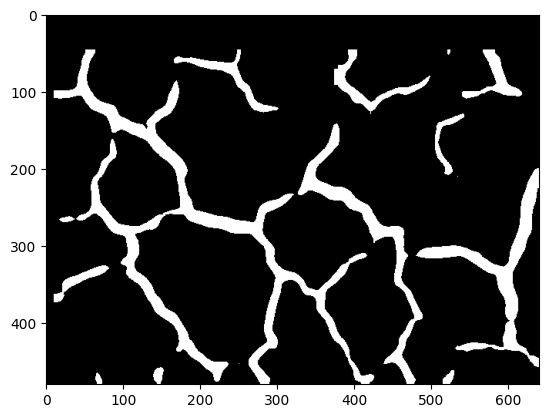

In [22]:
results=model(image_array)

for result in results:
    if result.masks:
        masks=result.masks.data
        boxes=result.boxes.data

        clss=boxes[:,5]

        object_indices=torch.where(clss==0)
        crack_masks=masks[object_indices]

        if len(crack_masks)==0:
            print("No mask found")

        mask=torch.any(crack_masks,dim=0).to(torch.uint8)*255
        mask=mask.cpu().numpy()
        plt.imshow(mask,cmap='grey')